# Dimension Reduction using PCA on IRIS

## Import needed packages

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Define some helper functions

In [2]:
def getTargetString(target):
  return iris.target_names[target]

vGetTargetString = np.vectorize(getTargetString)

## Load the dataset and create a DataFrame

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# add the target names
df['target'] = df['target'].astype(int)
df['target_name'] = vGetTargetString(df['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Reshape (flatten) and scale the dataset

In [4]:
ds = iris
x_flattend = np.reshape(ds.data,(len(ds.data),-1))

# we fit a standard scaler and save it for inverse transformation later
scaler = StandardScaler().fit(x_flattend)
x_scaled = scaler.transform(x_flattend)

print(f"Shape of the dataset: {x_scaled.shape}")
print(f"Min and Max values of the original datset: min = {x_flattend.min()} / max = {x_flattend.max()}")
print(f"Min and Max values of the scaled datset: min = {x_scaled.min()} / max = {x_scaled.max()}")

Shape of the dataset: (150, 4)
Min and Max values of the original datset: min = 0.1 / max = 7.9
Min and Max values of the scaled datset: min = -2.43394714190809 / max = 3.0907752482994253


## Perform the PCA

In [5]:
pca = PCA(n_components=2).fit(x_scaled)
z = pca.transform(x_scaled)
z_inverse = pca.inverse_transform(z)

print(f"Total Explained Variance of the two components: {round(pca.explained_variance_ratio_.sum(),2)}%")

Total Explained Variance of the two components: 0.96%


## Add the calculated z values to our DataFrame

In [6]:
principalDf = pd.DataFrame(data = z, columns = ['z_1', 'z_2'])
df = pd.concat([df, principalDf], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,z_1,z_2
0,5.1,3.5,1.4,0.2,0,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,setosa,-2.389842,0.646835


## Visualize the results

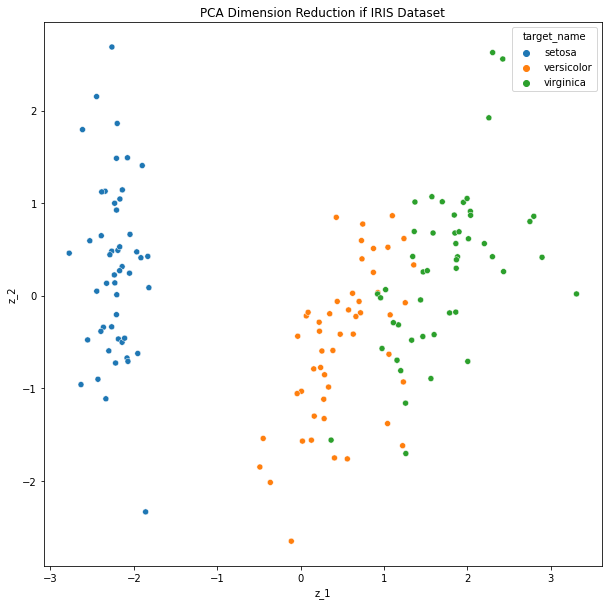

In [7]:
plt.figure(figsize=(10,10))
plt.title("PCA Dimension Reduction if IRIS Dataset")
sns.scatterplot(data=df, x="z_1", y="z_2", hue="target_name");